<a href="https://colab.research.google.com/github/syedghazihaider/LAB-assaingment-/blob/main/LAB8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import io
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import plot_model

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving wdbc.xlsx to wdbc (1).xlsx


In [ ]:
df = pd.read_excel('wdbc.xlsx')
file_name = list(uploaded.keys())[0]
df = pd.read_excel(io.BytesIO(uploaded[file_name]))

# Print head and tail of the dataset
print("Head of the dataset:")
print(df.head())

print("\nTail of the dataset:")
print(df.tail())

Head of the dataset:
         ID Diagnosis  Mean Radius  Mean Texture  Mean Perimeter  Mean Area  \
0    842517         M        20.57         17.77          132.90     1326.0   
1  84300903         M        19.69         21.25          130.00     1203.0   
2  84348301         M        11.42         20.38           77.58      386.1   
3  84358402         M        20.29         14.34          135.10     1297.0   
4    843786         M        12.45         15.70           82.57      477.1   

   Mean Smoothness  Mean Compactness  Mean Concavity  Mean Concave Points  \
0          0.08474           0.07864          0.0869              0.07017   
1          0.10960           0.15990          0.1974              0.12790   
2          0.14250           0.28390          0.2414              0.10520   
3          0.10030           0.13280          0.1980              0.10430   
4          0.12780           0.17000          0.1578              0.08089   

   ...  Worst Radius  Worst Texture  Wors

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 30)             │           930 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 50)             │         1,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 30)             │         1,530 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           310 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,331 (16.92 KB)

 Trainable params: 4,331 (16.92 KB)

 Non-trainable params: 0 (0.00 B)

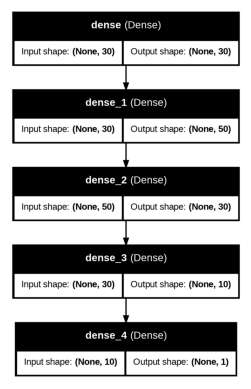

In [ ]:
df.drop(columns=["ID"], inplace=True)

# Convert Diagnosis column to binary
df["Diagnosis"] = df["Diagnosis"].map({"M": 1, "B": 0})

# Features and target
X = df.drop(columns=["Diagnosis"])
y = df["Diagnosis"]

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build Neural Network
model = Sequential()
model.add(Dense(30, input_shape=(30,), activation='relu'))   # Input layer
model.add(Dense(50, activation='tanh'))                       # 2nd layer
model.add(Dense(30, activation='relu'))                       # 3rd layer
model.add(Dense(10, activation='relu'))                       # 4th layer
model.add(Dense(1, activation='sigmoid'))                     # Output layer for binary classification

# Compile Model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()

# Visualize the model
plot_model(model, to_file="model.png", show_shapes=True, show_layer_names=True)

# Optional: Display model diagram
img = plt.imread("model.png")
plt.imshow(img)
plt.axis('off')
plt.show()

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving WA_Fn-UseC_-Telco-Customer-Churn.csv to WA_Fn-UseC_-Telco-Customer-Churn.csv


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                 │ (None, 30)             │           930 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 10)             │           310 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,251 (4.89 KB)

 Trainable params: 1,251 (4.89 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
308/308 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.7584 - loss: 0.5022 - val_accuracy: 0.7915 - val_loss: 0.4368
Epoch 2/50
308/308 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7937 - loss: 0.4351 - val_accuracy: 0.7848 - val_loss: 0.4278
Epoch 3/50
308/308 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.8041 - loss: 0.4187 - val_accuracy: 0.7981 - val_loss: 0.4234
Epoch 4/50
308/308 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8053 - loss: 0.4028 - val_accuracy: 0.7991 - val_loss: 0.4240
Epoch 5/50
308/308 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8041 - loss: 0.4067 - val_accuracy: 0.8009 - val_loss: 0.4260
Epoch 6/50
308/308 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8113 - loss: 0.3984 - val_accuracy: 0.7943 - val_loss: 0.4222
Epoch 7/50
308/308 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8116 - loss: 0.3939 - val_accuracy: 0.7905 - val_loss: 0.4218
Epoch 8/50
308/308 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8049 - loss: 0.4079 - val_accuracy: 

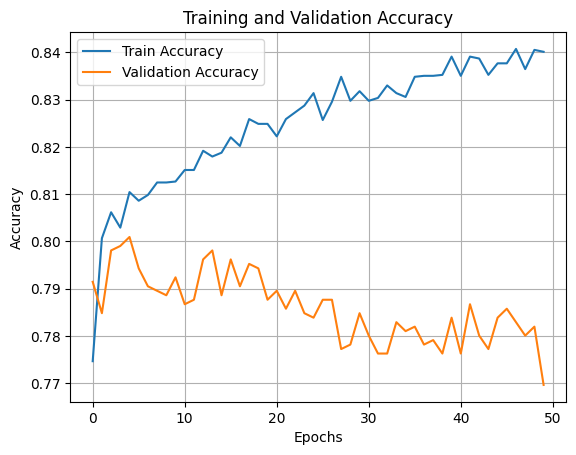

33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


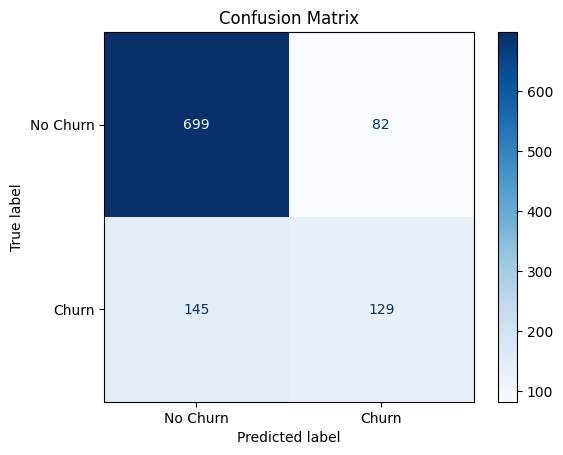

In [ ]:
# 1. Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import plot_model

# 2. Load Dataset
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")  # Use your actual file name/path

# 3. Perform EDA
print(df.info())
print(df.isnull().sum())
print(df.nunique())

# Drop customerID as it is not useful
df.drop("customerID", axis=1, inplace=True)

# Handle TotalCharges (convert to numeric)
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors='coerce')
df.dropna(inplace=True)  # Drop rows where TotalCharges is missing

# Encode target variable (Churn)
df["Churn"] = df["Churn"].map({"Yes": 1, "No": 0})

# Encode categorical features
categorical_cols = df.select_dtypes(include=['object']).columns
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# 4. Split dataset
X = df.drop("Churn", axis=1)
y = df["Churn"]

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into train, test, validation
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# 5. Build the model
model = Sequential()
model.add(Dense(X_train.shape[1], input_shape=(X_train.shape[1],), activation='relu'))  # input layer
model.add(Dense(10, activation='relu'))  # hidden layer
model.add(Dense(1, activation='sigmoid'))  # output layer

# 6. Model summary (shows total parameters)
model.summary()

# 7. Visualize model
plot_model(model, show_shapes=True)

# 8. Compile model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# 9. Train and validate model
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, batch_size=16, verbose=1)

# 10. Evaluate on test set
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"\nTest Accuracy: {test_acc:.4f}")

# 11. Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# 12. Confusion Matrix
y_pred = model.predict(X_test) > 0.5
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No Churn", "Churn"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()


In [ ]:
print(df.columns)

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'gender_Male', 'Partner_Yes', 'Dependents_Yes', 'PhoneService_Yes',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np

# Separate features and target
X = df.drop("Churn", axis=1)
y = df["Churn"].apply(lambda x: 1 if x == "Yes" else 0)  # Encode target

# Standardize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into train, validation, test
X_train_full, X_test, y_train_full, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.2, random_state=42)


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import plot_model

# Model
model = Sequential([
    Dense(X.shape[1], activation='relu', input_shape=(X.shape[1],)),  # Input layer
    Dense(10, activation='relu'),                                     # Hidden layer
    Dense(1, activation='sigmoid')                                    # Output layer (binary)
])



/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                 │ (None, 30)             │           930 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 10)             │           310 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,251 (4.89 KB)

 Trainable params: 1,251 (4.89 KB)

 Non-trainable params: 0 (0.00 B)

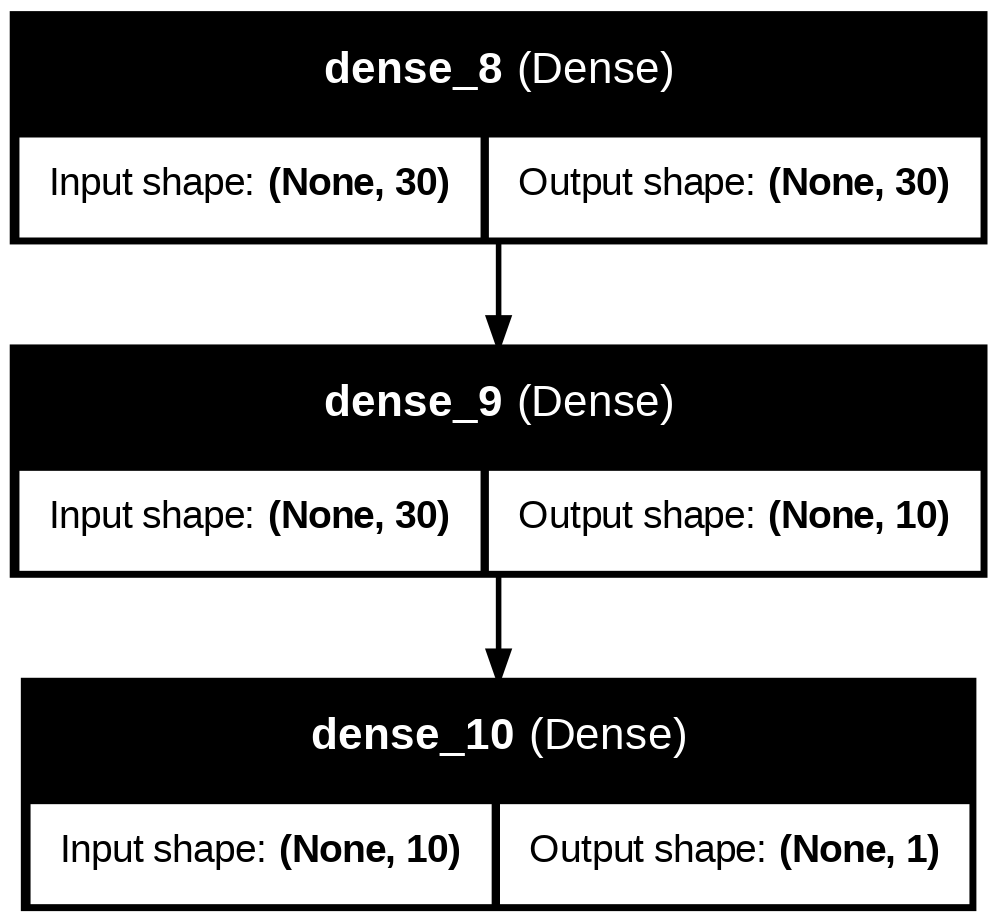

In [ ]:
plot_model(model, show_shapes=True, show_layer_names=True)

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=50, validation_data=(X_val, y_val), batch_size=32)


Epoch 1/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.3167 - loss: 0.9930 - val_accuracy: 1.0000 - val_loss: 0.1794
Epoch 2/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 1.0000 - loss: 0.1069 - val_accuracy: 1.0000 - val_loss: 0.0225
Epoch 3/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 1.0000 - loss: 0.0161 - val_accuracy: 1.0000 - val_loss: 0.0074
Epoch 4/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 1.0000 - loss: 0.0060 - val_accuracy: 1.0000 - val_loss: 0.0036
Epoch 5/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 1.0000 - loss: 0.0030 - val_accuracy: 1.0000 - val_loss: 0.0021
Epoch 6/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 1.0000 - loss: 0.0018 - val_accuracy: 1.0000 - val_loss: 0.0014
Epoch 7/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 1.0000 - loss: 0.0013 - val_accuracy: 1.0000 - val_loss: 9.6049e-04
Epoch 8/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 1.0000 - loss: 8.7375e-04 - val_accu

In [ ]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"\n✅ Test Accuracy: {test_accuracy:.4f}")


44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 3.9356e-06

✅ Test Accuracy: 1.0000


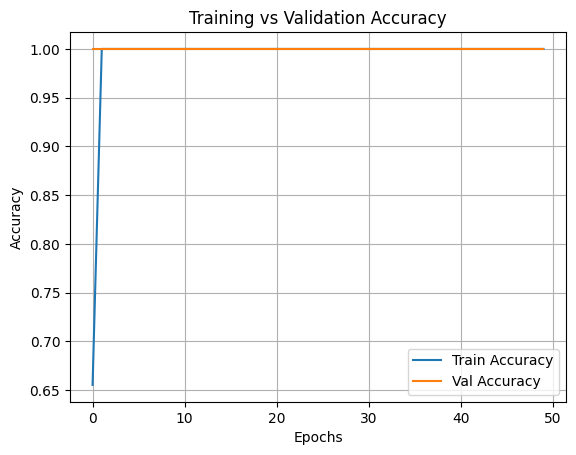

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()